## Rakuten Images challenge

### Initial exploration of Rakuten Images

In [1]:
import fastai
fastai.__version__

'1.0.28'

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
# fastai
from fastai import *
from fastai.vision import *
from fastai.vision.image import *

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# Sklearn
from sklearn.model_selection import StratifiedKFold

# Others
import subprocess
import cv2
from operator import itemgetter

In [4]:
path = Path('data')
train_path = path / 'training-data'
train_path.ls()

[PosixPath('data/training-data/train.csv'),
 PosixPath('data/training-data/class-mapping.csv'),
 PosixPath('data/training-data/train-images')]

In [6]:
df = pd.read_csv(train_path / 'train.csv', names=['filename', 'tag'])
df.head()

,filename,tag
0,1000000965.jpg,40
1,1310005493.jpg,31
2,1050002320.jpg,37
3,1340001721.jpg,33
4,1650001155.jpg,3


In [7]:
filenames = df['filename'].values
files_in_path = (train_path / 'train-images').ls()
files_in_path_names = list()
for i, f in enumerate(files_in_path):
    files_in_path_names.append(files_in_path[i].name)

In [8]:
extra_files = list(set(files_in_path_names) - set(filenames))
print(len(filenames), len(files_in_path), len(extra_files))

for i in range(len(extra_files)):
    subprocess.call(['rm', str(train_path / 'train-images' / extra_files[i])])

554656 554656 0


In [39]:
tags = df['tag'].values
tags

array([40, 31, 37, 33, ..., 13, 13, 20, 28])

In [40]:
unique, counts = np.unique(tags, return_counts=True)
print(dict(zip(unique, counts)), "\nSum:", counts.sum())

{0: 1529, 1: 13502, 2: 39805, 3: 37365, 4: 3701, 5: 30075, 6: 277, 7: 3334, 8: 563, 9: 1074, 10: 11522, 11: 10394, 12: 13681, 13: 30485, 14: 418, 15: 2170, 16: 22084, 17: 2003, 18: 7813, 19: 1417, 20: 14044, 21: 463, 22: 19664, 23: 3827, 24: 1507, 25: 543, 26: 386, 27: 5998, 28: 26737, 29: 306, 30: 250, 31: 1428, 32: 5620, 33: 43691, 34: 781, 35: 357, 36: 4122, 37: 127135, 38: 3079, 39: 1982, 40: 15093, 41: 26826, 42: 17605} 
Sum: 554656


In [11]:
total_train_set_len = 554656

In [14]:
# sorted(counts), 
idx_to_count_and_per= dict()
for u, c in zip(unique, counts):
    per = (c * 100) / total_train_set_len
    idx_to_count_and_per[u] = (c, per)

idx_to_count_and_per

{0: (1529, 0.2756663589684417),
 1: (13502, 2.4343016211850226),
 2: (39805, 7.176520221542722),
 3: (37365, 6.736607915536838),
 4: (3701, 0.6672604280851555),
 5: (30075, 5.422279755379911),
 6: (277, 0.049940864247389374),
 7: (3334, 0.6010932902555819),
 8: (563, 0.10150435585299718),
 9: (1074, 0.19363353141406567),
 10: (11522, 2.077323602376969),
 11: (10394, 1.8739543068135927),
 12: (13681, 2.4665738764207004),
 13: (30485, 5.496199446143195),
 14: (418, 0.0753620261928114),
 15: (2170, 0.39123348525933194),
 16: (22084, 3.981566953210639),
 17: (2003, 0.3611247331679455),
 18: (7813, 1.4086208388622858),
 19: (1417, 0.2554736629550568),
 20: (14044, 2.53201984653551),
 21: (463, 0.08347516298390353),
 22: (19664, 3.545260485778573),
 23: (3827, 0.6899772111002135),
 24: (1507, 0.2716999365372411),
 25: (543, 0.09789851727917845),
 26: (386, 0.06959268447470143),
 27: (5998, 1.0813909882882362),
 28: (26737, 4.820465297409566),
 29: (306, 0.055169330179426525),
 30: (250, 0.04

<BarContainer object of 43 artists>

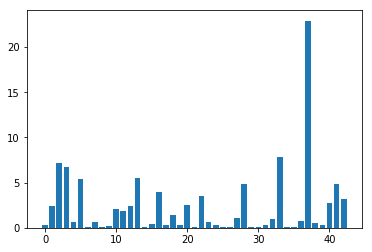

In [18]:
plt.bar(list(idx_to_count_and_per.keys()), list(map(itemgetter(1), idx_to_count_and_per.values())))

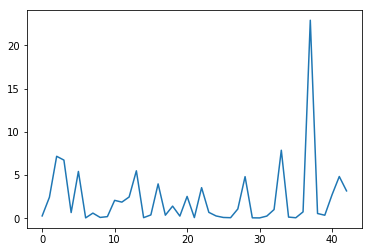

In [19]:
plt.plot(list(idx_to_count_and_per.keys()), list(map(itemgetter(1), idx_to_count_and_per.values())))

<BarContainer object of 43 artists>

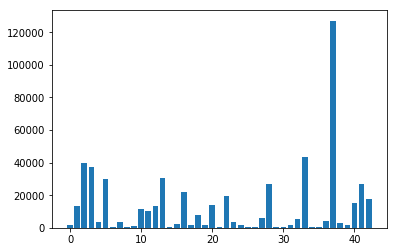

In [20]:
plt.bar(unique, counts)

<BarContainer object of 43 artists>

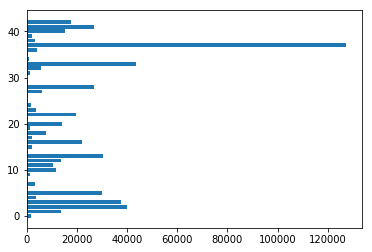

In [21]:
plt.barh(unique, counts)

(180, 240, 3)


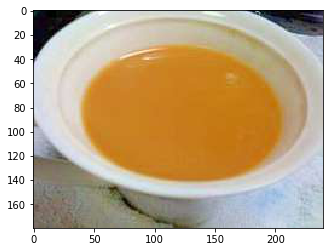

In [22]:
img = plt.imread(train_path / 'train-images/1000000965.jpg')
print(img.shape)
plt.imshow(img)

(180, 240, 3)


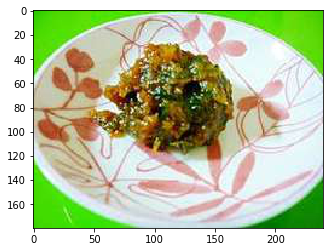

In [23]:
img = plt.imread(train_path / 'train-images/1050002320.jpg')
print(img.shape)
plt.imshow(img)

In [24]:
sizes = defaultdict(int)
count = 0

for i in (train_path / 'train-images').ls():
    i = str(i.absolute())
    img = cv2.imread(i)
    sizes[img.shape] += 1
    count += 1
    if count > 50:
        break
sizes

defaultdict(int,
            {(180, 240, 3): 26,
             (174, 240, 3): 1,
             (320, 240, 3): 10,
             (400, 240, 3): 3,
             (428, 240, 3): 1,
             (134, 240, 3): 1,
             (214, 240, 3): 1,
             (160, 240, 3): 3,
             (179, 240, 3): 2,
             (321, 240, 3): 1,
             (159, 240, 3): 1,
             (319, 240, 3): 1})

### StartifiedKFold

#### Check if StartifiedKFold creates same distribution (i_am_noob)

In [27]:
df.head()

,filename,tag
0,1000000965.jpg,40
1,1310005493.jpg,31
2,1050002320.jpg,37
3,1340001721.jpg,33
4,1650001155.jpg,3


In [28]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [64]:
for train, test in kfold.split(df['filename'].values, df['tag'].values):
    print(len(train), len(test))
    break

443708 110948


In [65]:
tmp = (df.iloc[test]).reset_index(drop=True)

In [66]:
tmp

,filename,tag
0,1050002320.jpg,37
1,1340001721.jpg,33
2,1010005392.jpg,26
3,1750014800.jpg,33
4,1570004154.jpg,37
5,1760019194.jpg,1
6,1210007168.jpg,22
7,1330012058.jpg,18
8,1650004834.jpg,40
9,1740002758.jpg,7


In [67]:
u, counts = np.unique(tmp['tag'].values, return_counts=True)
print(dict(zip(u, counts)), "\nSum:", counts.sum())

{0: 306, 1: 2701, 2: 7961, 3: 7473, 4: 741, 5: 6015, 6: 56, 7: 667, 8: 113, 9: 215, 10: 2305, 11: 2079, 12: 2737, 13: 6097, 14: 84, 15: 434, 16: 4417, 17: 401, 18: 1563, 19: 284, 20: 2809, 21: 93, 22: 3933, 23: 766, 24: 302, 25: 109, 26: 78, 27: 1200, 28: 5348, 29: 62, 30: 50, 31: 286, 32: 1124, 33: 8739, 34: 157, 35: 72, 36: 825, 37: 25427, 38: 616, 39: 397, 40: 3019, 41: 5366, 42: 3521} 
Sum: 110948


In [68]:
total_train_set_len = 110948

In [69]:
# sorted(counts), 
idx_to_count_and_per= dict()
for u, c in zip(unique, counts):
    per = (c * 100) / total_train_set_len
    idx_to_count_and_per[u] = (c, per)

idx_to_count_and_per

{0: (306, 0.2758048815661391),
 1: (2701, 2.4344738075494825),
 2: (7961, 7.175433536431481),
 3: (7473, 6.735587842953455),
 4: (741, 0.6678804484983957),
 5: (6015, 5.421458701373616),
 6: (56, 0.0504740959728882),
 7: (667, 0.6011825359627934),
 8: (113, 0.1018495150881494),
 9: (215, 0.19378447561019577),
 10: (2305, 2.0775498431697734),
 11: (2079, 1.8738508129934743),
 12: (2737, 2.466921440674911),
 13: (6097, 5.495367199048203),
 14: (84, 0.0757111439593323),
 15: (434, 0.3911742437898835),
 16: (4417, 3.981144319861557),
 17: (401, 0.3614305800915744),
 18: (1563, 1.4087680715290045),
 19: (284, 0.255975772433933),
 20: (2809, 2.531816706925767),
 21: (93, 0.08382305224068934),
 22: (3933, 3.544903918953023),
 23: (766, 0.6904135270577207),
 24: (302, 0.2721995889966471),
 25: (109, 0.09824422251865739),
 26: (78, 0.07030320510509427),
 27: (1200, 1.0815877708476043),
 28: (5348, 4.8202761654108235),
 29: (62, 0.05588203482712622),
 30: (50, 0.045066157118650176),
 31: (286, 0

<BarContainer object of 43 artists>

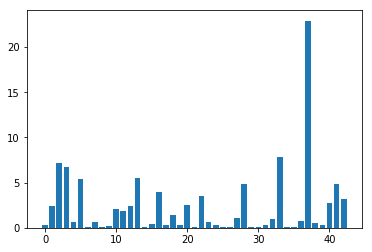

In [70]:
plt.bar(list(idx_to_count_and_per.keys()), list(map(itemgetter(1), idx_to_count_and_per.values())))

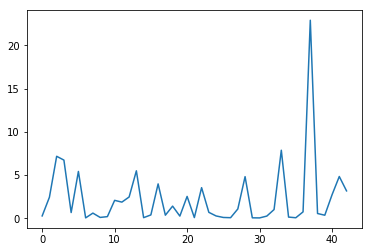

In [71]:
plt.plot(list(idx_to_count_and_per.keys()), list(map(itemgetter(1), idx_to_count_and_per.values())))

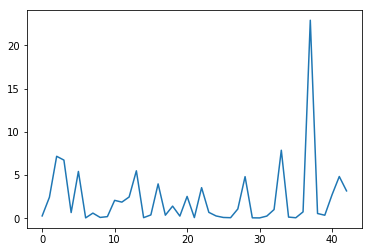

In [19]:
plt.plot(list(idx_to_count_and_per.keys()), list(map(itemgetter(1), idx_to_count_and_per.values())))

<BarContainer object of 43 artists>

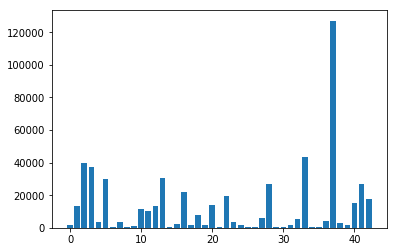

In [20]:
plt.bar(unique, counts)

<BarContainer object of 43 artists>

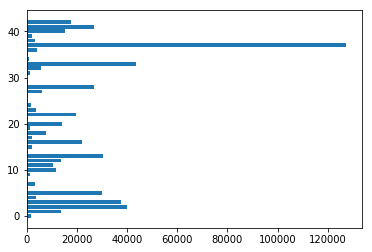

In [21]:
plt.barh(unique, counts)

#### Create data

In [72]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
def get_data(df, path, folder, cols, valid_idx):
    data = (ImageItemList.from_df(df, path, folder, cols)
            .split_from_idx(valid_idx)
            .label_from_df(cols=1)
            .transform(get_transforms(flip_vert=True), size=128)
            .databunch(bs=64)
           ).normalize(imagenet_stats)
    
    return data

###### temp

In [16]:
# data = (ImageItemList.from_df(df, path, folder='training-data/train-images', cols=0)
#         .random_split_by_pct(0.3)
#         .label_from_df(cols=1)
#         .transform(get_transforms(flip_vert=True), size=28)
#         .databunch(bs=512)
# ).normalize(imagenet_stats)

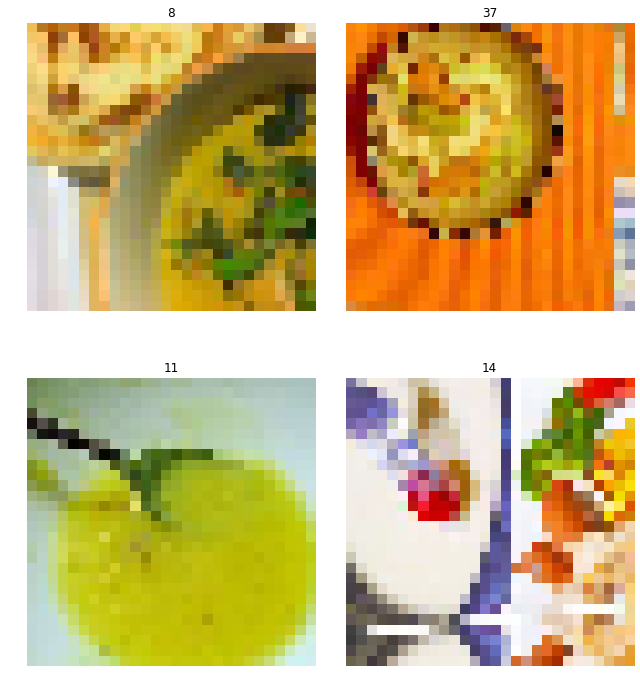

In [17]:
data.show_batch(2)

In [18]:
data.c

43

In [19]:
# mappings = pd.read_csv(train_path / 'class-mapping.csv')
# number, name = mappings['numeric'].values, mappings['english_translated_by_google_translate'].values
# mappings = dict(zip(number, name))

###### Utility functions

In [26]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=False, reduce=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduce = reduce

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.cross_entropy_with_logits(inputs, targets, reduce=False)
        else:
            BCE_loss = F.cross_entropy(inputs, targets, reduce=False)
        pt = torch.exp(-BCE_loss)
        F_loss = (self.alpha * (1 - pt) ** self.gamma) * BCE_loss

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss

In [27]:
def top_3_accuracy(input:Tensor, targs:Tensor, top=3):
    "Compute accuracy with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = (input.topk(top, -1)[1]).view(n, -1)
    targs = targs.view(n, -1)
    x = (input == targs)
    res = torch.zeros(n)
    for i in range(n):
        res[i] = x[i].any()
    
    return res.float().mean()

#### Learner

In [28]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate, top_3_accuracy], loss_func=FocalLoss())

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


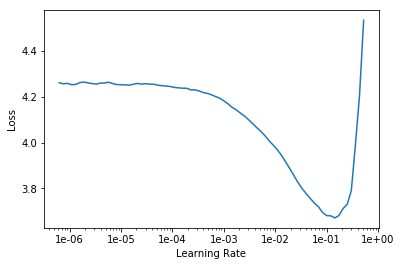

In [29]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(1, 1e-2)

Total time: 07:17
epoch  train_loss  valid_loss  error_rate  top_3_accuracy
1      2.302568    2.228783    0.721360    0.508960        (07:17)



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


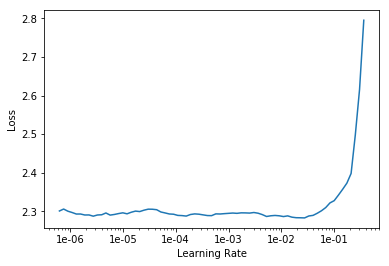

In [31]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(1, 1e-5)

Total time: 05:52
epoch  train_loss  valid_loss  error_rate  top_3_accuracy
1      2.678921    2.652474    0.723120    0.504387        (05:52)



In [29]:
data2 = (ImageItemList.from_df(df[:250000], path, folder='training-data/train-images', cols=0)
        .random_split_by_pct(0.3)
        .label_from_df(cols=1)
        .transform(get_transforms(flip_vert=True), size=64)
        .databunch(bs=512)
).normalize(imagenet_stats)